In [38]:
#Dependencies:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import json
import time
import pprint as pprint
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='jatinku', api_key='MiyRiKB8B9iM1tI6wo0A')


In [2]:
# Name of the CSV file from US News and World Report:
kaggle_file = "../Resources/universities.csv"
# Name of the file from CollegeRaptor
insti_file = "../Resources/cc_institution_details.csv"


In [3]:
#Reading the US News and World Report file:
uni_df = pd.read_csv(kaggle_file)
uni_df.head()

,Unnamed: 0,rankingNoteText,nonResponderText,nonResponder,act_avg,primaryPhoto,primaryPhotoThumb,sat_avg,enrollment,city,...,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey,univ_rank
0,1,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,...,national-universities,NaN,NaN,national-universities,1,private,NaN,ranked,2627,1.0
1,2,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,...,national-universities,NaN,NaN,national-universities,2,private,NaN,ranked,2155,2.0
2,3,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,...,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774,3.0
3,4,NaN,NaN,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,...,national-universities,NaN,NaN,national-universities,3,private,NaN,ranked,1426,3.0
4,5,NaN,NaN,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,...,national-universities,NaN,NaN,national-universities,5,private,NaN,ranked,2707,5.0


In [4]:
#condense some columns!
new_uni_df = uni_df[["displayName",
                    "city",
                    "state",
                    "rankingSortRank",
                    "act_avg",
                    "sat_avg",
                    "acceptance_rate",
                    "engineeringRepScore",
                    "businessRepScore",
                    "tuition"]]
new_uni_df.head()

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,NaN,47140
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,NaN,48949
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,NaN,NaN,54825
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,NaN,51400
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,NaN,57208


In [5]:
#Reading the College Raptor file:
insti_df = pd.read_csv(insti_file, encoding="ISO-8859-1")
insti_df.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [6]:
# Creating new dataframe with only the needed data:
new_insti_df = insti_df[["chronname","control","grad_100_value","retain_value"]]
new_insti_df.head()

,chronname,control,grad_100_value,retain_value
0,Alabama A&M University,Public,10.0,63.1
1,University of Alabama at Birmingham,Public,29.4,80.2
2,Amridge University,Private not-for-profit,0.0,37.5
3,University of Alabama at Huntsville,Public,16.5,81.0
4,Alabama State University,Public,8.8,62.2


In [7]:
# Renamed the universities columns to match both Df's:
new_insti2 = new_insti_df.rename({"chronname": "displayName"}, axis=1)
new_insti2.head()

,displayName,control,grad_100_value,retain_value
0,Alabama A&M University,Public,10.0,63.1
1,University of Alabama at Birmingham,Public,29.4,80.2
2,Amridge University,Private not-for-profit,0.0,37.5
3,University of Alabama at Huntsville,Public,16.5,81.0
4,Alabama State University,Public,8.8,62.2


In [8]:
#So, for this dataframe to make sense, a graduation value of 100 seems unlikely, as does 0. The same goes for retain_value
#I go about cleaning it.

#drop NaN rows
no_null_cleaner_insti_df = new_insti2.dropna(how='any')

#drop the instituions with 0's:

#drop the institutions with a grad_100_value of 0
no_null_cleaner_insti_no0_grad = no_null_cleaner_insti_df.loc[no_null_cleaner_insti_df['grad_100_value']!=0.0]

#drop the institutions with a retain_value of 0
no_null_cleaner_insti_no0_grad_no0_retain = no_null_cleaner_insti_no0_grad.loc[no_null_cleaner_insti_no0_grad['retain_value']!=0.0]


#drop the institutions with 100's:

#drop the 100s of grad_100
cleaner_insti_no0_grad_no0_retain_no100grad = no_null_cleaner_insti_no0_grad_no0_retain.loc[no_null_cleaner_insti_no0_grad_no0_retain['grad_100_value']!=100]

#drop the 100s of retain_value
cleaner_insti_no0grad_no0_retain_no100grad_no100retain = cleaner_insti_no0_grad_no0_retain_no100grad.loc[cleaner_insti_no0_grad_no0_retain_no100grad['retain_value']!=100]

#make it easier to read
clean_insti = cleaner_insti_no0grad_no0_retain_no100grad_no100retain

#try it out
clean_insti.head()


,displayName,control,grad_100_value,retain_value
0,Alabama A&M University,Public,10.0,63.1
1,University of Alabama at Birmingham,Public,29.4,80.2
3,University of Alabama at Huntsville,Public,16.5,81.0
4,Alabama State University,Public,8.8,62.2
5,University of Alabama at Tuscaloosa,Public,42.7,87.0


In [9]:
#Seperate private and public here so I don't need to do the same thing twice.
final_private=clean_insti.loc[clean_insti['control']=='Private not-for-profit']
final_public=clean_insti.loc[clean_insti['control']=='Public']



In [10]:
public_40=final_public.head(40)
private_40=final_private.head(40)
final_all=private_40.append(public_40)
#This gives me a 50/50 dataset. While that isn't incredibly useful for visualizations, I feel it's a more workable dataset
#since final_all is huuuuuuge, I'm going to limit it to the first 80.
final_80=final_all.head(80)

In [11]:
#I should sort this, based on grad_100_value...
grad_final_all = final_all.sort_values(['grad_100_value'],ascending=False)
last_all=grad_final_all.head(80)
#adding sequence now to denote rank
last_all['sequence']=range(1,1+len(last_all))
last_all.head()

C:\Users\pjatin\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,displayName,control,grad_100_value,retain_value,sequence
51,Talladega College,Private not-for-profit,82.4,32.9,1
163,California Institute of Technology,Private not-for-profit,82.3,96.6,2
155,Bethesda Christian University,Private not-for-profit,65.2,92.9,3
122,Hendrix College,Private not-for-profit,63.3,87.8,4
164,California Lutheran University,Private not-for-profit,61.3,84.8,5


In [12]:
#I can now locate the grad_100 and retain_value numbers for each of my three examples.

#UNCC
new_insti2uncc=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Charlotte', :]
new_insti2uncc['sequence']=85

#UNCW
new_insti2uncw=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Wilmington',:]
new_insti2uncw['sequence']=84

#UNCA
new_insti2unca=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Asheville',:]
new_insti2unca['sequence']=83

C:\Users\pjatin\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pjatin\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\pjatin\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [13]:
#Merge two dataframes using an inner join
merge_df = pd.merge(new_uni_df, new_insti2, on = "displayName")

In [14]:
#So what this will be is the US News and World Report ranking with added columns.
merge_df.head(130)

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,NaN,47140,Private not-for-profit,87.8,97.6
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,NaN,48949,Private not-for-profit,86.5,97.1
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,NaN,NaN,54825,Private not-for-profit,87.9,99.3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,NaN,51400,Private not-for-profit,89.6,98.7
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,NaN,57208,Private not-for-profit,85.6,97.3
5,Massachusetts Institute of Technology,Cambridge,MA,5,33.0,1460.0,8.0,4.9,4.6,49892,Private not-for-profit,83.5,97.9
6,Stanford University,Stanford,CA,5,31.0,1380.0,5.0,4.8,NaN,49617,Private not-for-profit,76.1,98.6
7,University of Pennsylvania,Philadelphia,PA,8,32.0,1380.0,9.0,3.6,4.8,53534,Private not-for-profit,87.9,97.8
8,Duke University,Durham,NC,9,31.0,1380.0,11.0,3.7,NaN,53744,Private not-for-profit,87.1,97.2
9,California Institute of Technology,Pasadena,CA,10,34.0,1510.0,8.0,4.6,NaN,49908,Private not-for-profit,82.3,96.6


In [15]:
# creating new df from which to graph and dropping null values of grad_100_value and retain_value.
graphing_df = merge_df
graphing_df["act_avg"] = graphing_df["act_avg"].replace("NaN", np.nan).fillna(0)
graphing_df["sat_avg"] = graphing_df["sat_avg"].replace("NaN", np.nan).fillna(0)
graphing_df["acceptance_rate"] = graphing_df["acceptance_rate"].replace("NaN", np.nan).fillna(0)
graphing_df["retain_value"] = graphing_df["retain_value"].dropna(axis=0, how='any')
graphing_df["grad_100_value"] = graphing_df["grad_100_value"].dropna(axis=0, how='any')
graphing_df["engineeringRepScore"] = graphing_df["engineeringRepScore"].replace("NaN", np.nan).fillna(0)
graphing_df["businessRepScore"] = graphing_df["businessRepScore"].replace("NaN", np.nan).fillna(0)

In [16]:
# Replacing the null values with zero:
merge_df["act_avg"] = merge_df["act_avg"].replace("NaN", np.nan).fillna(0)
merge_df["sat_avg"] = merge_df["sat_avg"].replace("NaN", np.nan).fillna(0)
merge_df["acceptance_rate"] = merge_df["acceptance_rate"].replace("NaN", np.nan).fillna(0)
merge_df["retain_value"] = merge_df["retain_value"].replace("NaN", np.nan).fillna(0)
merge_df["grad_100_value"] = merge_df["grad_100_value"].replace("NaN", np.nan).fillna(0)
merge_df["engineeringRepScore"] = merge_df["engineeringRepScore"].replace("NaN", np.nan).fillna(0)
merge_df["businessRepScore"] = merge_df["businessRepScore"].replace("NaN", np.nan).fillna(0)

In [17]:
#adding a sequence to graph by.
graphing_no0 = graphing_df.loc[graphing_df['grad_100_value']!=0.0]
graph_df = graphing_no0.head(80)
graph_df['sequence']=range(1,1+len(graph_df))

C:\Users\pjatin\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
graph_df.head(40)

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value,sequence
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,0.0,47140,Private not-for-profit,87.8,97.6,1
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,0.0,48949,Private not-for-profit,86.5,97.1,2
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,0.0,0.0,54825,Private not-for-profit,87.9,99.3,3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,0.0,51400,Private not-for-profit,89.6,98.7,4
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,0.0,57208,Private not-for-profit,85.6,97.3,5
5,Massachusetts Institute of Technology,Cambridge,MA,5,33.0,1460.0,8.0,4.9,4.6,49892,Private not-for-profit,83.5,97.9,6
6,Stanford University,Stanford,CA,5,31.0,1380.0,5.0,4.8,0.0,49617,Private not-for-profit,76.1,98.6,7
7,University of Pennsylvania,Philadelphia,PA,8,32.0,1380.0,9.0,3.6,4.8,53534,Private not-for-profit,87.9,97.8,8
8,Duke University,Durham,NC,9,31.0,1380.0,11.0,3.7,0.0,53744,Private not-for-profit,87.1,97.2,9
9,California Institute of Technology,Pasadena,CA,10,34.0,1510.0,8.0,4.6,0.0,49908,Private not-for-profit,82.3,96.6,10


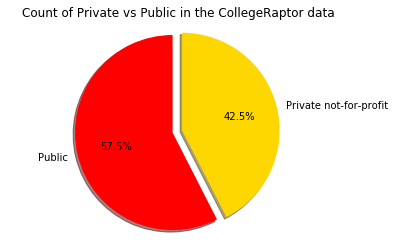

<Figure size 432x288 with 0 Axes>

In [19]:
#Since I basically studied how private vs. public fared, my graphs pull from my seperated frames above.

# Determine counts for pie chart
#since I'm looking at the full set here, I want to keep all values, and not limit it to just the 80, as that will give
#me a 50/50
all_private_count = final_private['displayName'].count()
all_public_count = final_public['displayName'].count()

#since the private for-profit isn't in here, I'll need to keep total to just private and public
all_count = all_public_count+all_private_count

#Determine sizes for pie chart
all_public_percent = (all_public_count)/(all_count)
all_private_percent = (all_private_count)/(all_count)

# Build Pie Chart
labels = 'Public','Private not-for-profit'
sizes = [all_public_percent, all_private_percent]
colors="Red","Gold"
explode = [0,0.1]
plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title("Count of Private vs Public in the CollegeRaptor data")

# Show Figure
plt.show()
plt.savefig('publicprivateallpie.png')

In [20]:
#For the bar charts comparing private and public's business and engineering scores, I made two dataframes from merge_df to find
#values for public and for private.

#I first need the US News and World Report data by private and public
public_universities_df = merge_df.loc[merge_df['control']=='Public']
private_universities_df = merge_df.loc[merge_df['control']=='Private not-for-profit']

# Determine axes for the public and private Business score
mean_public_business_score =public_universities_df['businessRepScore'].mean()
mean_public_engineering_score = public_universities_df['engineeringRepScore'].mean()

mean_private_business_score = private_universities_df['businessRepScore'].mean()
mean_private_engineering_score = private_universities_df['engineeringRepScore'].mean()

x_axispub = 'Public'
x_axispri ='Private' 


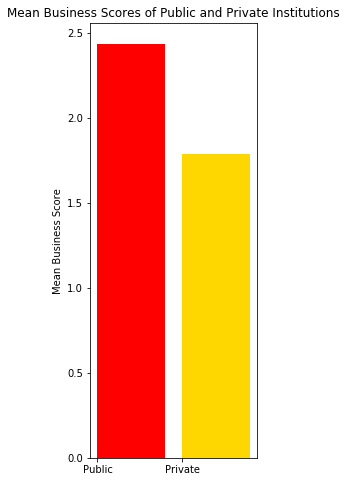

In [21]:
#Our hypothesis stated that the rankings were not necessarily dependent on the money spent. This appears to support it.
plt.figure(figsize=(3,8))
pubbusbar = plt.bar(x_axispub, mean_public_business_score, color='Red', align="edge")
pribusbar = plt.bar(x_axispri, mean_private_business_score, color='Gold', align="edge")
plt.title("Mean Business Scores of Public and Private Institutions")
plt.ylabel("Mean Business Score")
plt.show()

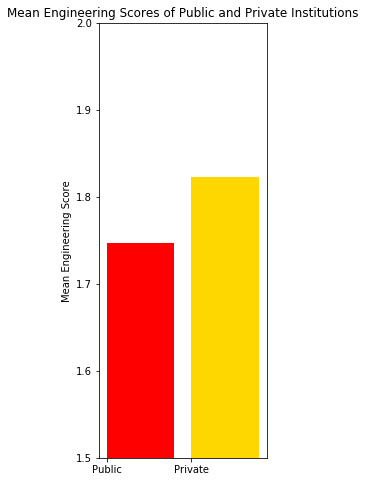

In [22]:
plt.figure(figsize=(3,8))
pub_eng_bar = plt.bar(x_axispub, mean_public_engineering_score, color='Red', align="edge")
pri_eng_bar = plt.bar(x_axispri, mean_private_engineering_score, color='Gold', align="edge")
plt.ylim(1.5,2,1)
plt.title("Mean Engineering Scores of Public and Private Institutions")
plt.ylabel("Mean Engineering Score")
plt.show()
#Although, for engineering, Private seems to have a slight advantage. Perhaps our hypothesis could be adjusted to include
#"depending on what you study"

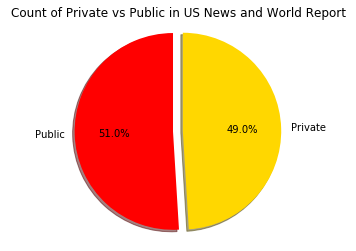

In [23]:
#This is the smaller US News and World Report dataset (that we merged above)

#Determine sizes for pie chart
public_count = public_universities_df['displayName'].count()

private_count = private_universities_df['displayName'].count()

total_count = public_count+private_count

public_percent = (public_count)/(total_count)
private_percent = (private_count)/(total_count)

# Build Pie Chart
labels = 'Public','Private'
sizes = [public_percent, private_percent]
colors="Red","Gold"
explode = [0,0.1]
plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('Count of Private vs Public in US News and World Report')
# Show Figure
plt.show()

#Perhaps the closer numbers might influence the breakdowns described in the bar charts above?

In [24]:
#In order to show money spent, I would like a pie chart of tuition. The way I came up with the values for this
#was with sums.
public_tuition = public_universities_df['tuition'].sum()
private_tuition = private_universities_df['tuition'].sum()
total_tuition = public_tuition+private_tuition

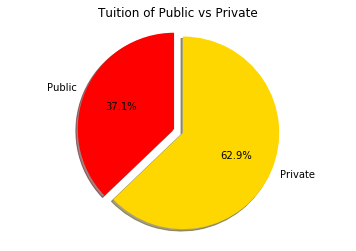

In [25]:
#Determine sizes for pie chart
publictuition_percent = (public_tuition)/(total_tuition)
privatetuition_percent = (private_tuition)/(total_tuition)
# Build Pie Chart
labels = 'Public','Private'
sizes = [publictuition_percent, privatetuition_percent]
colors="Red","Gold"
explode=[0,0.1]
plt.pie(sizes, labels=labels,explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('Tuition of Public vs Private')
# Show Figure
plt.show()

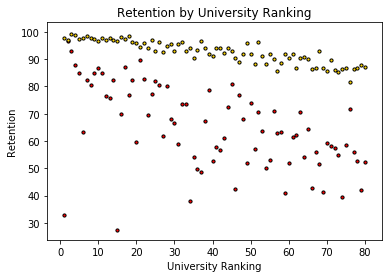

In [26]:
#the US News and World Report Data
totalcount=graph_df['sequence']
total_grad=graph_df['grad_100_value']
total_retain=graph_df['retain_value']
totalcount_2= graph_df['sequence']

#The first 80 points of the larger institutional data
total_count2=last_all['sequence']
grad_2=last_all['grad_100_value']
retain_2=last_all['retain_value']

scatter_total_all=plt.scatter(total_count2,retain_2,s=10,facecolor='Red',edgecolor='Black')

scatter_total=plt.scatter(totalcount,total_retain,s=10,facecolor='Gold',edgecolor='Black')
plt.title("Retention by University Ranking")
plt.xlabel("University Ranking")
plt.ylabel("Retention")

plt.show()
#This, as I predicted, is nonsense. Though the US News and World Report data appears to trend down.

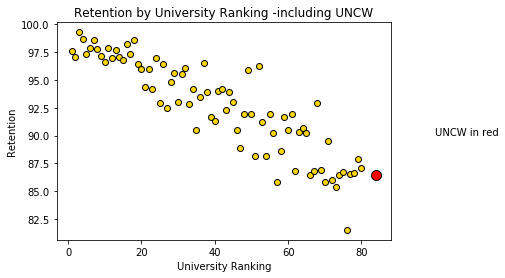

In [27]:
totalcount=graph_df['sequence']
total_grad=graph_df['grad_100_value']
total_retain=graph_df['retain_value']

#adding UNCW to see where it fits.
total_count3=new_insti2uncw['sequence']
grad_3=new_insti2uncw['grad_100_value']
retain_3=new_insti2uncw['retain_value']

scatter_total_uncw = plt.scatter(total_count3,retain_3,s=100,facecolor='Red',edgecolor='Black')
scatter_total=plt.scatter(totalcount,total_retain,facecolor='Gold',edgecolor='Black')

plt.title("Retention by University Ranking -including UNCW")

plt.xlabel("University Ranking")
plt.ylabel("Retention")

plt.text(100,90, s='UNCW in red', fontdict=None, withdash=False)

plt.show()
#So UNCW performed about as expected with the rest of the data.

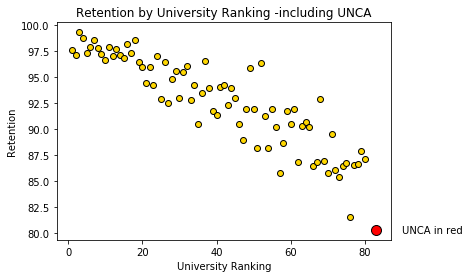

In [28]:
#So I graduated from UNCA. Let's see where it falls on Retention (guessing not great)

#UNCA!
total_count4=new_insti2unca['sequence']
grad_4=new_insti2unca['grad_100_value']
retain_4=new_insti2unca['retain_value']

scatter_total_unca = plt.scatter(total_count4,retain_4,s=100,facecolor='Red',edgecolor='Black')
 
scatter_total=plt.scatter(totalcount,total_retain,facecolor='Gold',edgecolor='Black')

plt.title("Retention by University Ranking -including UNCA")
plt.xlabel("University Ranking")
plt.ylabel("Retention")
plt.text(90,80, s='UNCA in red', fontdict=None, withdash=False)
plt.show()
#UNCA did not fare as well. Oh well.

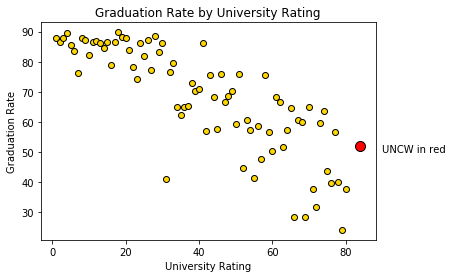

In [29]:
total_count_uncw=new_insti2uncw['sequence']
grad_uncw=new_insti2uncw['grad_100_value']
retain_uncw=new_insti2uncw['retain_value']
scatter_total_grad_uncw = plt.scatter(total_count_uncw,grad_uncw,s=100,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total_grad=plt.scatter(totalcount,total_grad,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by University Rating")
plt.xlabel("University Rating")
plt.ylabel("Graduation Rate")
plt.text(90,50, s='UNCW in red', fontdict=None, withdash=False)
plt.show()

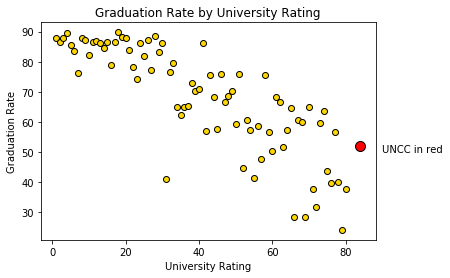

In [30]:
scatter_total_grad_uncc = plt.scatter(total_count3,grad_3,s=100,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total_grad=plt.scatter(totalcount,total_grad,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by University Rating")
plt.xlabel("University Rating")
plt.ylabel("Graduation Rate")
plt.text(90,50,s='UNCC in red',fontdict=None, withdash=False)
plt.show()

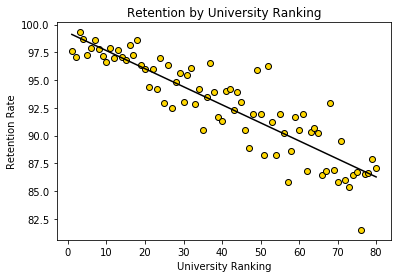

In [31]:
#So I eventually made scatter plots of just the total retain by the ranking
scatter_total_grad = plt.scatter(totalcount,total_retain,facecolor='Gold',edgecolor='Black')
plt.title("Retention by University Ranking")
plt.xlabel("University Ranking")
plt.ylabel("Retention Rate")
#looked through documentation to figure out how to do a trendline
z = np.polyfit(totalcount, total_retain, 1)
p = np.poly1d(z)
plt.plot(totalcount,p(totalcount),"k-")
plt.show()
#plt.savefig('retention_by_universityrank.png')

<function matplotlib.pyplot.show(*args, **kw)>

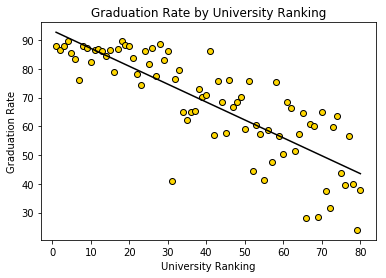

In [32]:
#And the Graduation Rate by the ranking.
scatter_total_grad=plt.scatter(totalcount,total_grad,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by University Ranking")
plt.xlabel("University Ranking")
plt.ylabel("Graduation Rate")
z = np.polyfit(totalcount, total_grad, 1)
p = np.poly1d(z)
plt.plot(totalcount,p(totalcount),"k-")
plt.show
#both of these showed the expected trend. Higher-ranked universities have higher graduation and retention rates.

In [33]:
merge_df["sequence"]=range(1,1+len(merge_df))
merge_df.head(50)

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value,sequence
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,0.0,47140,Private not-for-profit,87.8,97.6,1
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,0.0,48949,Private not-for-profit,86.5,97.1,2
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,0.0,0.0,54825,Private not-for-profit,87.9,99.3,3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,0.0,51400,Private not-for-profit,89.6,98.7,4
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,0.0,57208,Private not-for-profit,85.6,97.3,5
5,Massachusetts Institute of Technology,Cambridge,MA,5,33.0,1460.0,8.0,4.9,4.6,49892,Private not-for-profit,83.5,97.9,6
6,Stanford University,Stanford,CA,5,31.0,1380.0,5.0,4.8,0.0,49617,Private not-for-profit,76.1,98.6,7
7,University of Pennsylvania,Philadelphia,PA,8,32.0,1380.0,9.0,3.6,4.8,53534,Private not-for-profit,87.9,97.8,8
8,Duke University,Durham,NC,9,31.0,1380.0,11.0,3.7,0.0,53744,Private not-for-profit,87.1,97.2,9
9,California Institute of Technology,Pasadena,CA,10,34.0,1510.0,8.0,4.6,0.0,49908,Private not-for-profit,82.3,96.6,10


In [34]:
merge_df = merge_df.head(80)
x = merge_df["sequence"]
y = merge_df["rankingSortRank"]
s = merge_df["tuition"]
lst = merge_df["control"]

In [35]:
def pltcolors(lst):
    cols=[]  
    for l in lst:
        if l == "Public":
            cols.append("gold")
        else:
            cols.append("lightblue")            
    return cols

cols = pltcolors(lst)  


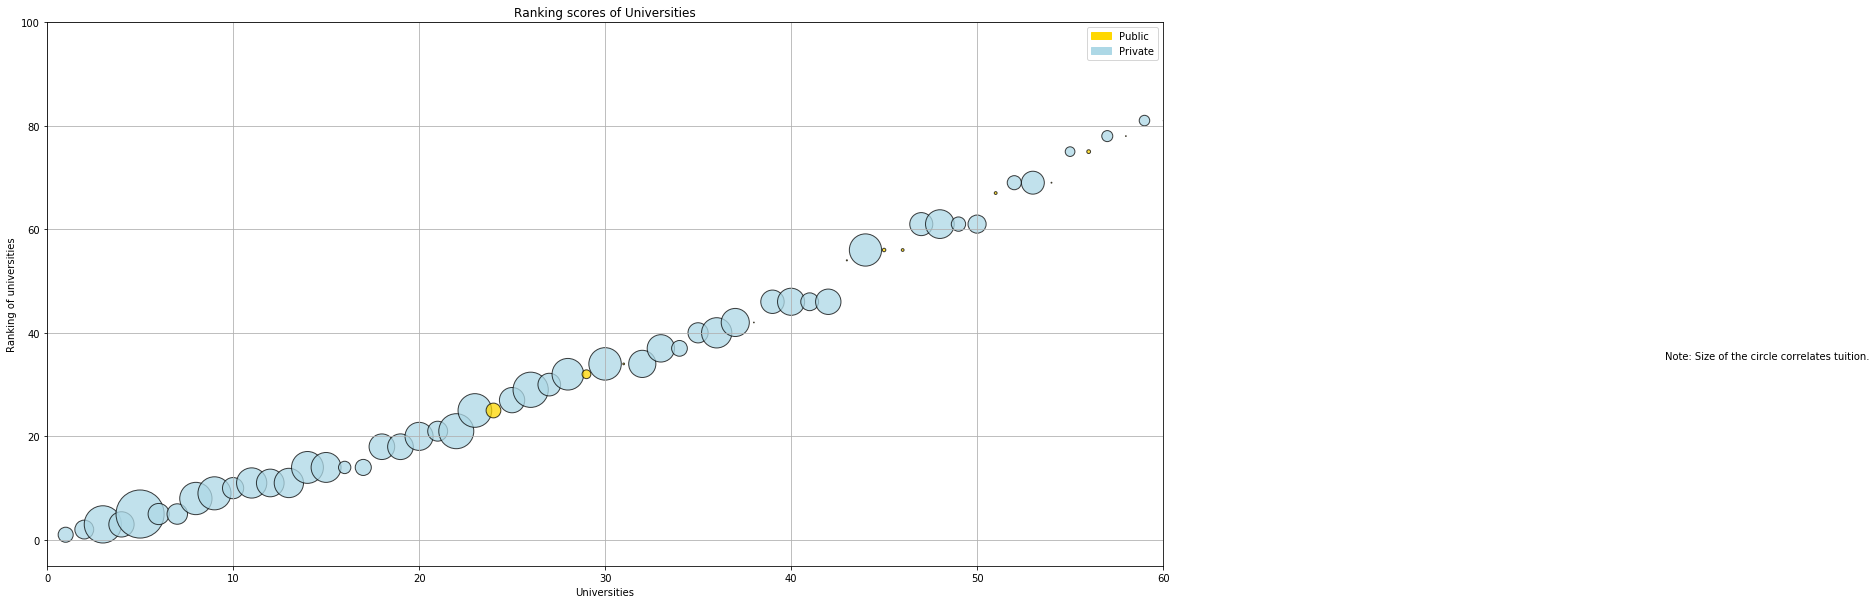

<Figure size 1440x720 with 0 Axes>

In [36]:
mpl.rcParams['figure.figsize'] = (20,10)
plt.scatter(x=x, y=y,s= (s/30000)**12, c=cols, edgecolors = "black", alpha =0.75)
plt.grid(axis="both")    
    
gold_patch = mpatches.Patch(color='gold', label='Public')
lightblue_patch = mpatches.Patch(color='lightblue', label='Private')
plt.legend(handles=[gold_patch, lightblue_patch])

plt.text(87,35,s="Note: Size of the circle correlates tuition.")
plt.xlim(0,60,5)
plt.ylim(-5,100,10)
plt.title("Ranking scores of Universities")
plt.xlabel("Universities")
plt.ylabel("Ranking of universities")
fig=plt.gcf()
plt.show()
plt.draw()

In [39]:
uni_df = uni_df.head(80)
geo_df = uni_df[["state"]]
chart = geo_df.groupby(['state']).size().reset_index(name='counts')

for col in geo_df.columns:
    chart[col] = chart[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#chart['text'] = chart['state'] + "Count " +chart['counts']


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = chart['state'],
        z = chart['counts'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = 'Top University Locations by State <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )
py.plot( fig, filename='d3-cloropleth-map' )

url = py.plot( fig, filename='d3-cloropleth-map' )


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jatinku/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jatinku/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [42]:
uni_df["sequence"] = range(1,1+len(uni_df))
sat_act = uni_df[["sequence","sat_avg","act_avg"]]
y1 = sat_act["sat_avg"]
y2 = sat_act["act_avg"]
x = sat_act["sequence"]

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=x,
    y=y1,
    name='sat data'
)
trace2 = go.Scatter(
    x=x,
    y=y2,
    name='act data',
    yaxis='y2'
)

data = [trace1, trace2]
layout = go.Layout(
    title='Double Y Axis Example',
    yaxis=dict(
        title='yaxis title'
    ),
    yaxis2=dict(
        title='yaxis2 title',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

In [44]:
import plotly.graph_objs as go
# set x-axis labels and their corresponding data values
labels = ['End of Q1', 'End of Q2', 'End of Q3', 'End of Q4']
tickvals = ['2016-04-01', '2016-07-01', '2016-10-01', "apple_df_2016.Date.max()"]

x = sat_act["sequence"]
y0 = sat_act["sat_avg"]
y1 = sat_act["act_avg"]
y2 = merge_df["acceptance_rate"]

data=[
    go.Scatter(
        x = x, 
        y= y0, 
        name='SAT', 
        marker=dict(color='#851e52'),
    ),
    go.Scatter(
        x=x, 
        y=y1,
        name='ACT', 
        yaxis='y2',
        mode = 'lines+markers',
        marker=dict(color='#d3560e'),
    ),
    go.Scatter(
        x=x, 
        y=y2,
        name='Acceptance Rate', 
        yaxis='y2',
        mode = 'markers',
        marker=dict(color='#FFBAD2'),
    ),
]

layout = go.Layout(
    title='SAT/ACT Scores Vs. Acceptance Rate based on University Ranking',
    xaxis=go.layout.XAxis(
        ticktext=labels,
        tickvals=tickvals
    ),
    yaxis2= dict(
        overlaying='y',
        side='right',
        showgrid=False,
    )
)
fig = go.Figure(data, layout)

py.iplot(fig, filename='Scores Vs Acceptance Rate')